# **Aeropolis Dataset Analysis and Prediction**

# Objective

This notebook aims to analyze the Aeropolis dataset, focusing on exploring the data, building predictive models, and optimizing their performance. The dataset consists of 10,000 samples, and the target variable is `Cargo_Capacity_kg`. The workflow is as follows:

1. Import required libraries.
2. Load and inspect the dataset.
3. Perform exploratory data analysis (EDA).
4. Preprocess the data (handling missing values, scaling, encoding).
5. Engineer features for improved model performance.
6. Train and evaluate models.
7. Optimize the best-performing model.
8. Conclude with insights and observations.

---


# Step 1: Importing Libraries

We import the necessary libraries for data manipulation, visualization, and machine learning:  

- **Pandas** for data manipulation and analysis.
- **NumPy** for numerical operations including handling arrays and performing mathematical computations.  
- **Matplotlib** for creating static, animated, and interactive visualizations.  
- **Seaborn** for statistical plots.  
- **Scipy** for defining continuous distributions and efficiently sampling hyperparameters during randomized search.
- **Scikit-learn (sklearn)** for machine learning, including model building, evaluation, and preprocessing.  
- **tqdm** for visualizing progress.  

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tqdm import tqdm
import missingno as msno

# Enable progress bar for loops
tqdm.pandas()


# Step 2: Loading and Inspecting the Dataset

*   By using `read_csv` function of pandas module, we loaded the Aeropolis dataset.

*   In order to keep the training process time efficient and prevent underfitting at the same time, we used 5% of the dataset.

*   After that we took a quick look at datasets structure by previewing the first few rows using `head()` function.






In [47]:
# Load the dataset
df = pd.read_csv('aeropolis.csv')

# Sample 1% of the data
df = df.sample(frac=0.01, random_state=42)

# Preview the dataset
print("A preview of the dataset:\n\n", df.head())

A preview of the dataset:

         Cargo_Capacity_kg  Air_Temperature_Celsius Weather_Status  \
987231                NaN                20.714165          Rainy   
79954                 NaN                36.810433         Cloudy   
567130                NaN                28.921376          Sunny   
500891           4.740405                28.497487          Sunny   
55399            8.403688                39.751696         Cloudy   

       Package_Type Vertical_Landing  Equipment_Cost  Market_Region  \
987231         Rice      Unsopported             NaN       National   
79954          Rice          Unknown             NaN  International   
567130        Maize              NaN        21544.27       National   
500891         Rice      Unsopported        29496.35  International   
55399        Cotton        Supported        34257.55          Local   

       Flight_Duration_Minutes Terrain_Type  Water_Usage_liters  Flight_Hours  \
987231                    True         Silt      

As it seen in the output, we noticed that the dataset has missing values.

In the EDA part we handled the missing values.

# Step 3: Exploratory Data Analysis (EDA)

To understand the dataset better, we:
1. Generated summary statistics for numerical columns.
2. Checked for missing values and visualized them.
3. Analyzed correlations between the features and created Heatmap.
4. Created regression plot
5. Checked the unique values of categorical values
6. Checked the skewness

By using the `describe()` function of pandas library we printed summary statistics of numerical columns.

In [48]:
# Summary statistics
print(df.describe())

       Cargo_Capacity_kg  Air_Temperature_Celsius  Equipment_Cost  \
count        8984.000000              9006.000000     8988.000000   
mean            4.659237                27.455052    30133.104634   
std             1.696224                 7.224410    11519.267095   
min            -0.260744                15.000068    10008.800000   
25%             3.433689                21.147101    20446.295000   
50%             4.659752                27.290995    30233.065000   
75%             5.884908                33.694795    40227.190000   
max             9.612279                39.997214    49996.100000   

       Water_Usage_liters  Flight_Hours  Delivery_Time_Minutes  \
count         9032.000000   9039.000000            8992.000000   
mean          4998.830234    149.949663             104.244217   
std           1503.567943     12.266298              25.700727   
min          -1193.300000    105.000000              60.000000   
25%           3973.905000    142.000000         

To show the sum of the missing values for each column, we used `isnull().sum()`.

In [49]:
# Check for missing values
print("Missing values for each column:\n\n", df.isnull().sum())

Missing values for each column:

 Cargo_Capacity_kg                1016
Air_Temperature_Celsius           994
Weather_Status                    971
Package_Type                     1015
Vertical_Landing                 1044
Equipment_Cost                   1012
Market_Region                     976
Flight_Duration_Minutes          1023
Terrain_Type                      985
Water_Usage_liters                968
Flight_Hours                      961
Delivery_Time_Minutes            1008
Cleaning_Liquid_Usage_liters      963
Climate_Zone                      965
Quantum_Battery                   947
Flight_Zone                       977
Autopilot_Quality_Index           966
Vertical_Max_Speed               1030
Wind_Speed_kmph                  1045
Route_Optimization_Per_Second    1036
dtype: int64


By looking at the output we can conclude that, **almost 10% of each column is missing.**

With `missingno` module of python, we also visualize the missing values of the dataset.

Graph of missing values:



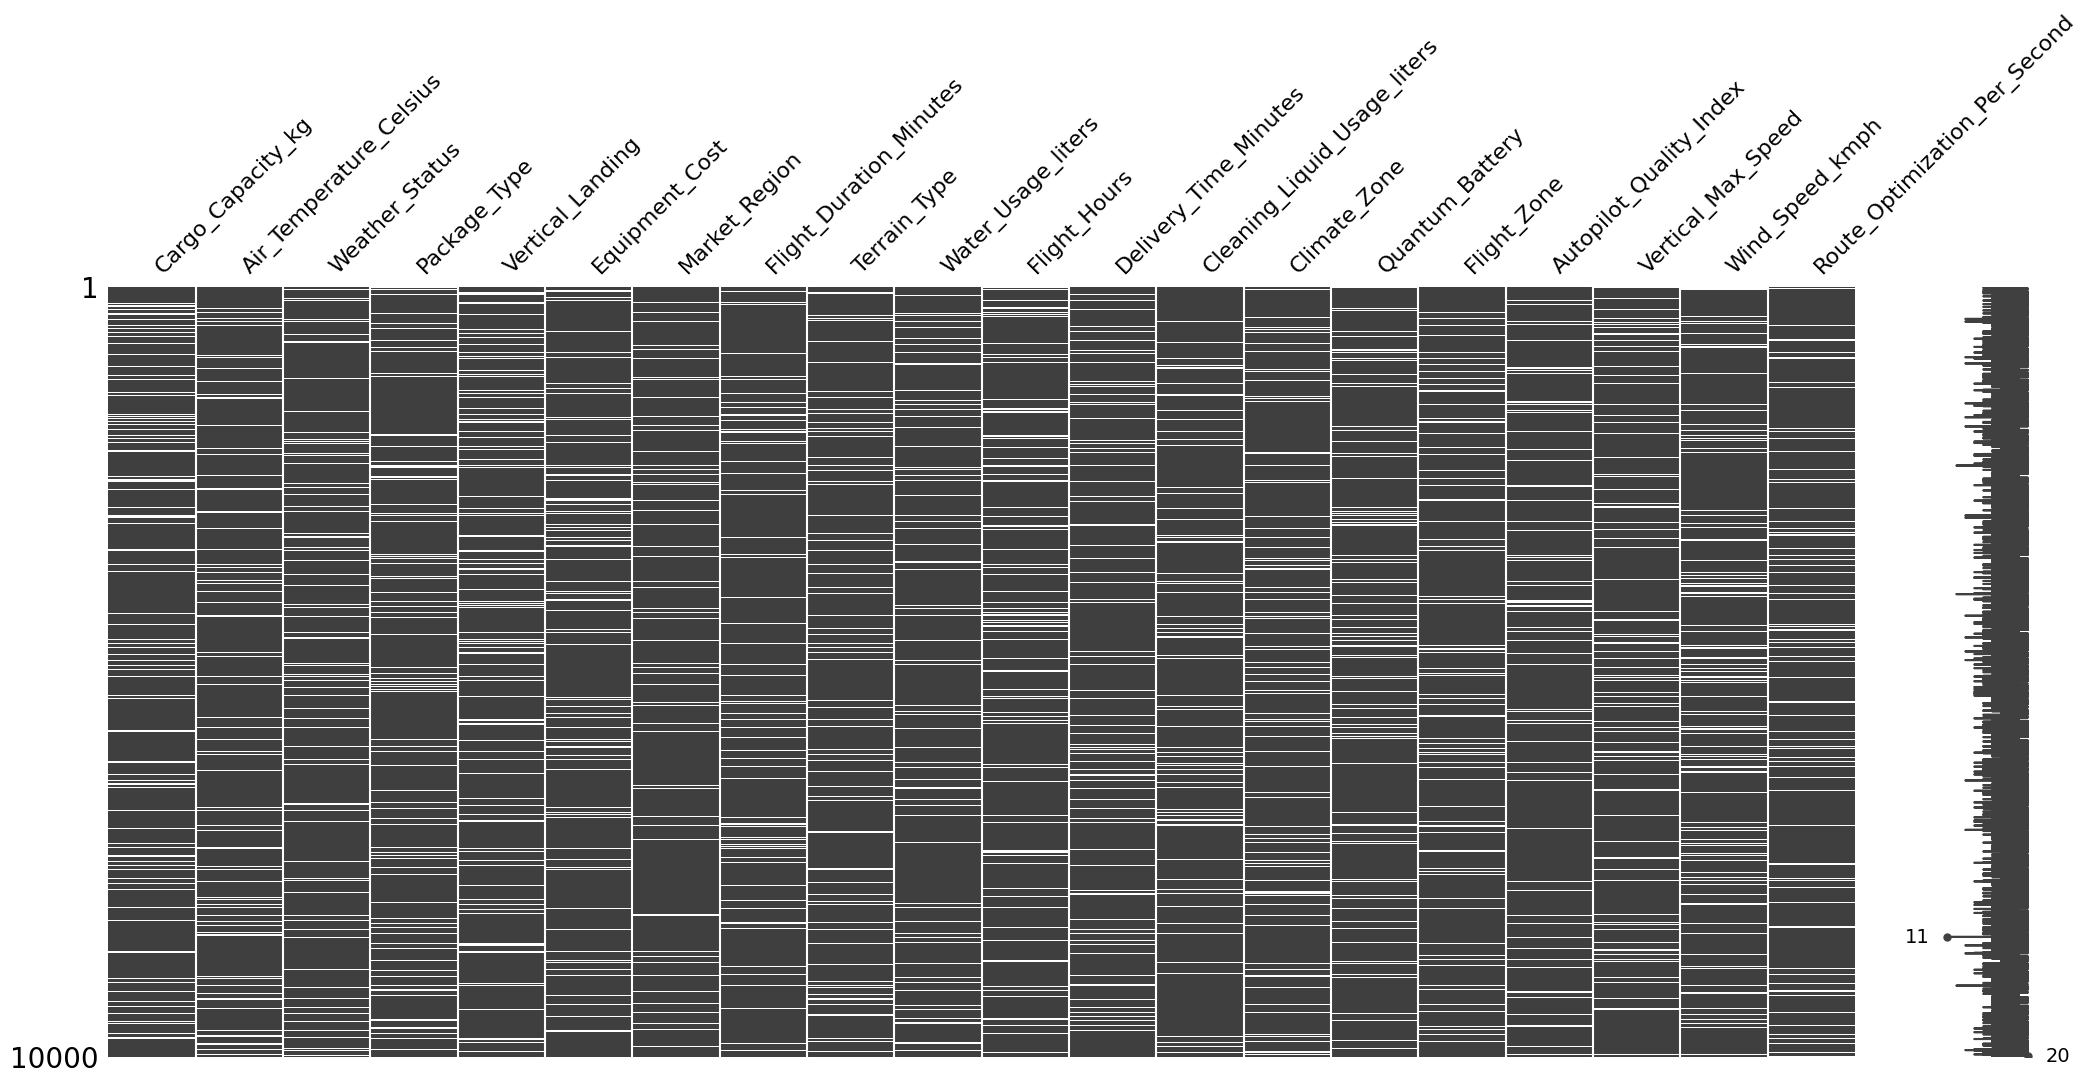

In [50]:
# Visualize missing values
print("Graph of missing values:\n")

msno.matrix(df)
plt.show()

To see the correlation between numerical features of the dataset we generated a heatmap by using `seaborn` library.

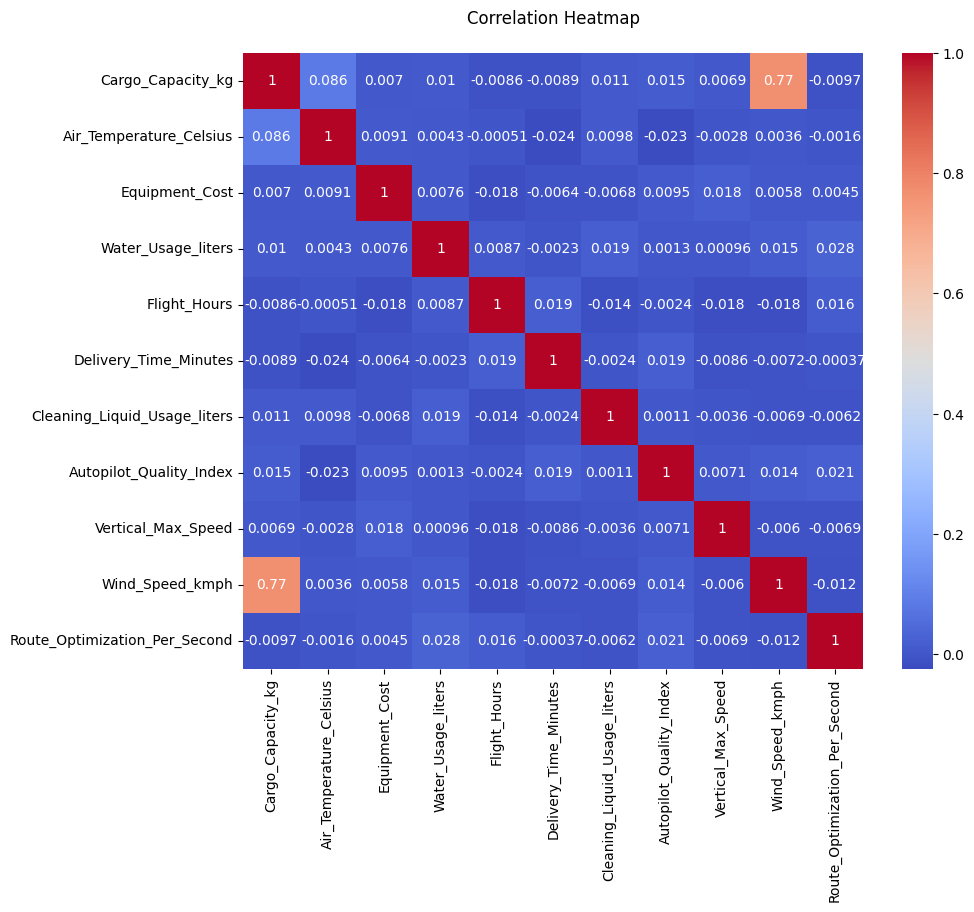

In [51]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm').set(title="Correlation Heatmap\n")
plt.show()

*   We can clearly say that the correlation between **Wind_Speed_kmph** and **Cargo_Capacity_kg** is high.
*   By looking the graph we can also say that there is a slight correlation  between **Air_Temperature_Celsius** and **Cargo_Capacity_kg**, which as still close to 0 but higher than the other correlations.



To see the biggest correlation of the features in detail, we demonstrated a regression plot by using `matplotlib` module.

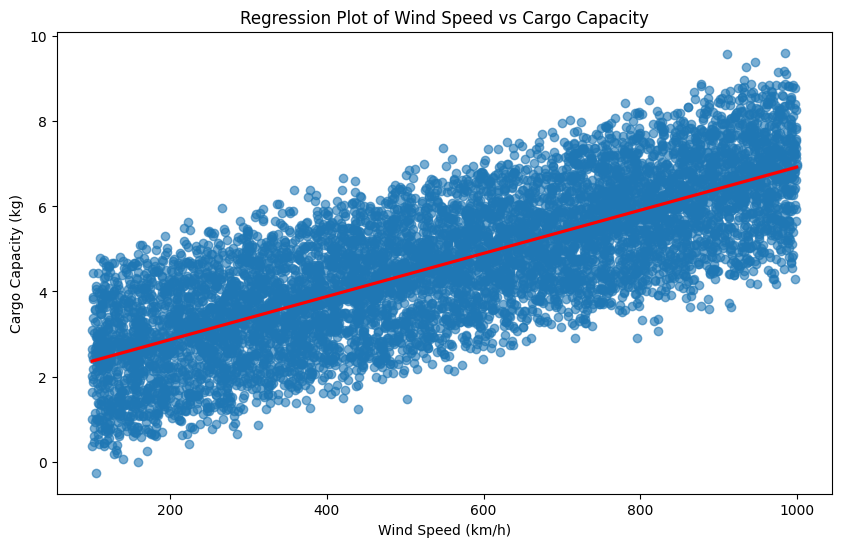

In [52]:
#Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Wind_Speed_kmph', y='Cargo_Capacity_kg', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Regression Plot of Wind Speed vs Cargo Capacity')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Cargo Capacity (kg)')
plt.show()

By looking the red line of the regression plot, we can reapprove the relationship between **Cargo Capacity** and **Wind Speed**.

As the code below shows the number of unique values of categorical features.

In [53]:
# Checking categorical features' unique values
print("Unique values for each categorical feature:\n")
print(df.select_dtypes(include=['object']).nunique())

Unique values for each categorical feature:

Weather_Status             3
Package_Type               6
Vertical_Landing           3
Market_Region              3
Flight_Duration_Minutes    2
Terrain_Type               6
Climate_Zone               4
Quantum_Battery            2
Flight_Zone                4
dtype: int64


By using the `skew()` function of pandas module, we checked for the skewness.

In [54]:
# Check skewness of all numerical variables
skewness_values = df.select_dtypes(include=['int64', 'float64']).skew()

# Print the skewness values
print("Skewness Values for Numerical Values:\n\n", skewness_values)

Skewness Values for Numerical Values:

 Cargo_Capacity_kg               -0.019170
Air_Temperature_Celsius          0.026224
Equipment_Cost                  -0.013464
Water_Usage_liters              -0.025885
Flight_Hours                     0.053895
Delivery_Time_Minutes            0.015529
Cleaning_Liquid_Usage_liters     2.054627
Autopilot_Quality_Index         -0.013417
Vertical_Max_Speed               0.003262
Wind_Speed_kmph                 -0.001575
Route_Optimization_Per_Second    0.024011
dtype: float64


By looking at the results, it is clear that all numerical data **except Cleaning Liquid Usage** have skewness near to zero.

*   **For viewing the distribution of numerical features in the dataset**, we created histograms with density plots for each feature.
*   After selecting the numerical columns of the dataset the code shows a subplot of histograms that gives all the features' densities via `plt.subplots()` funtion.

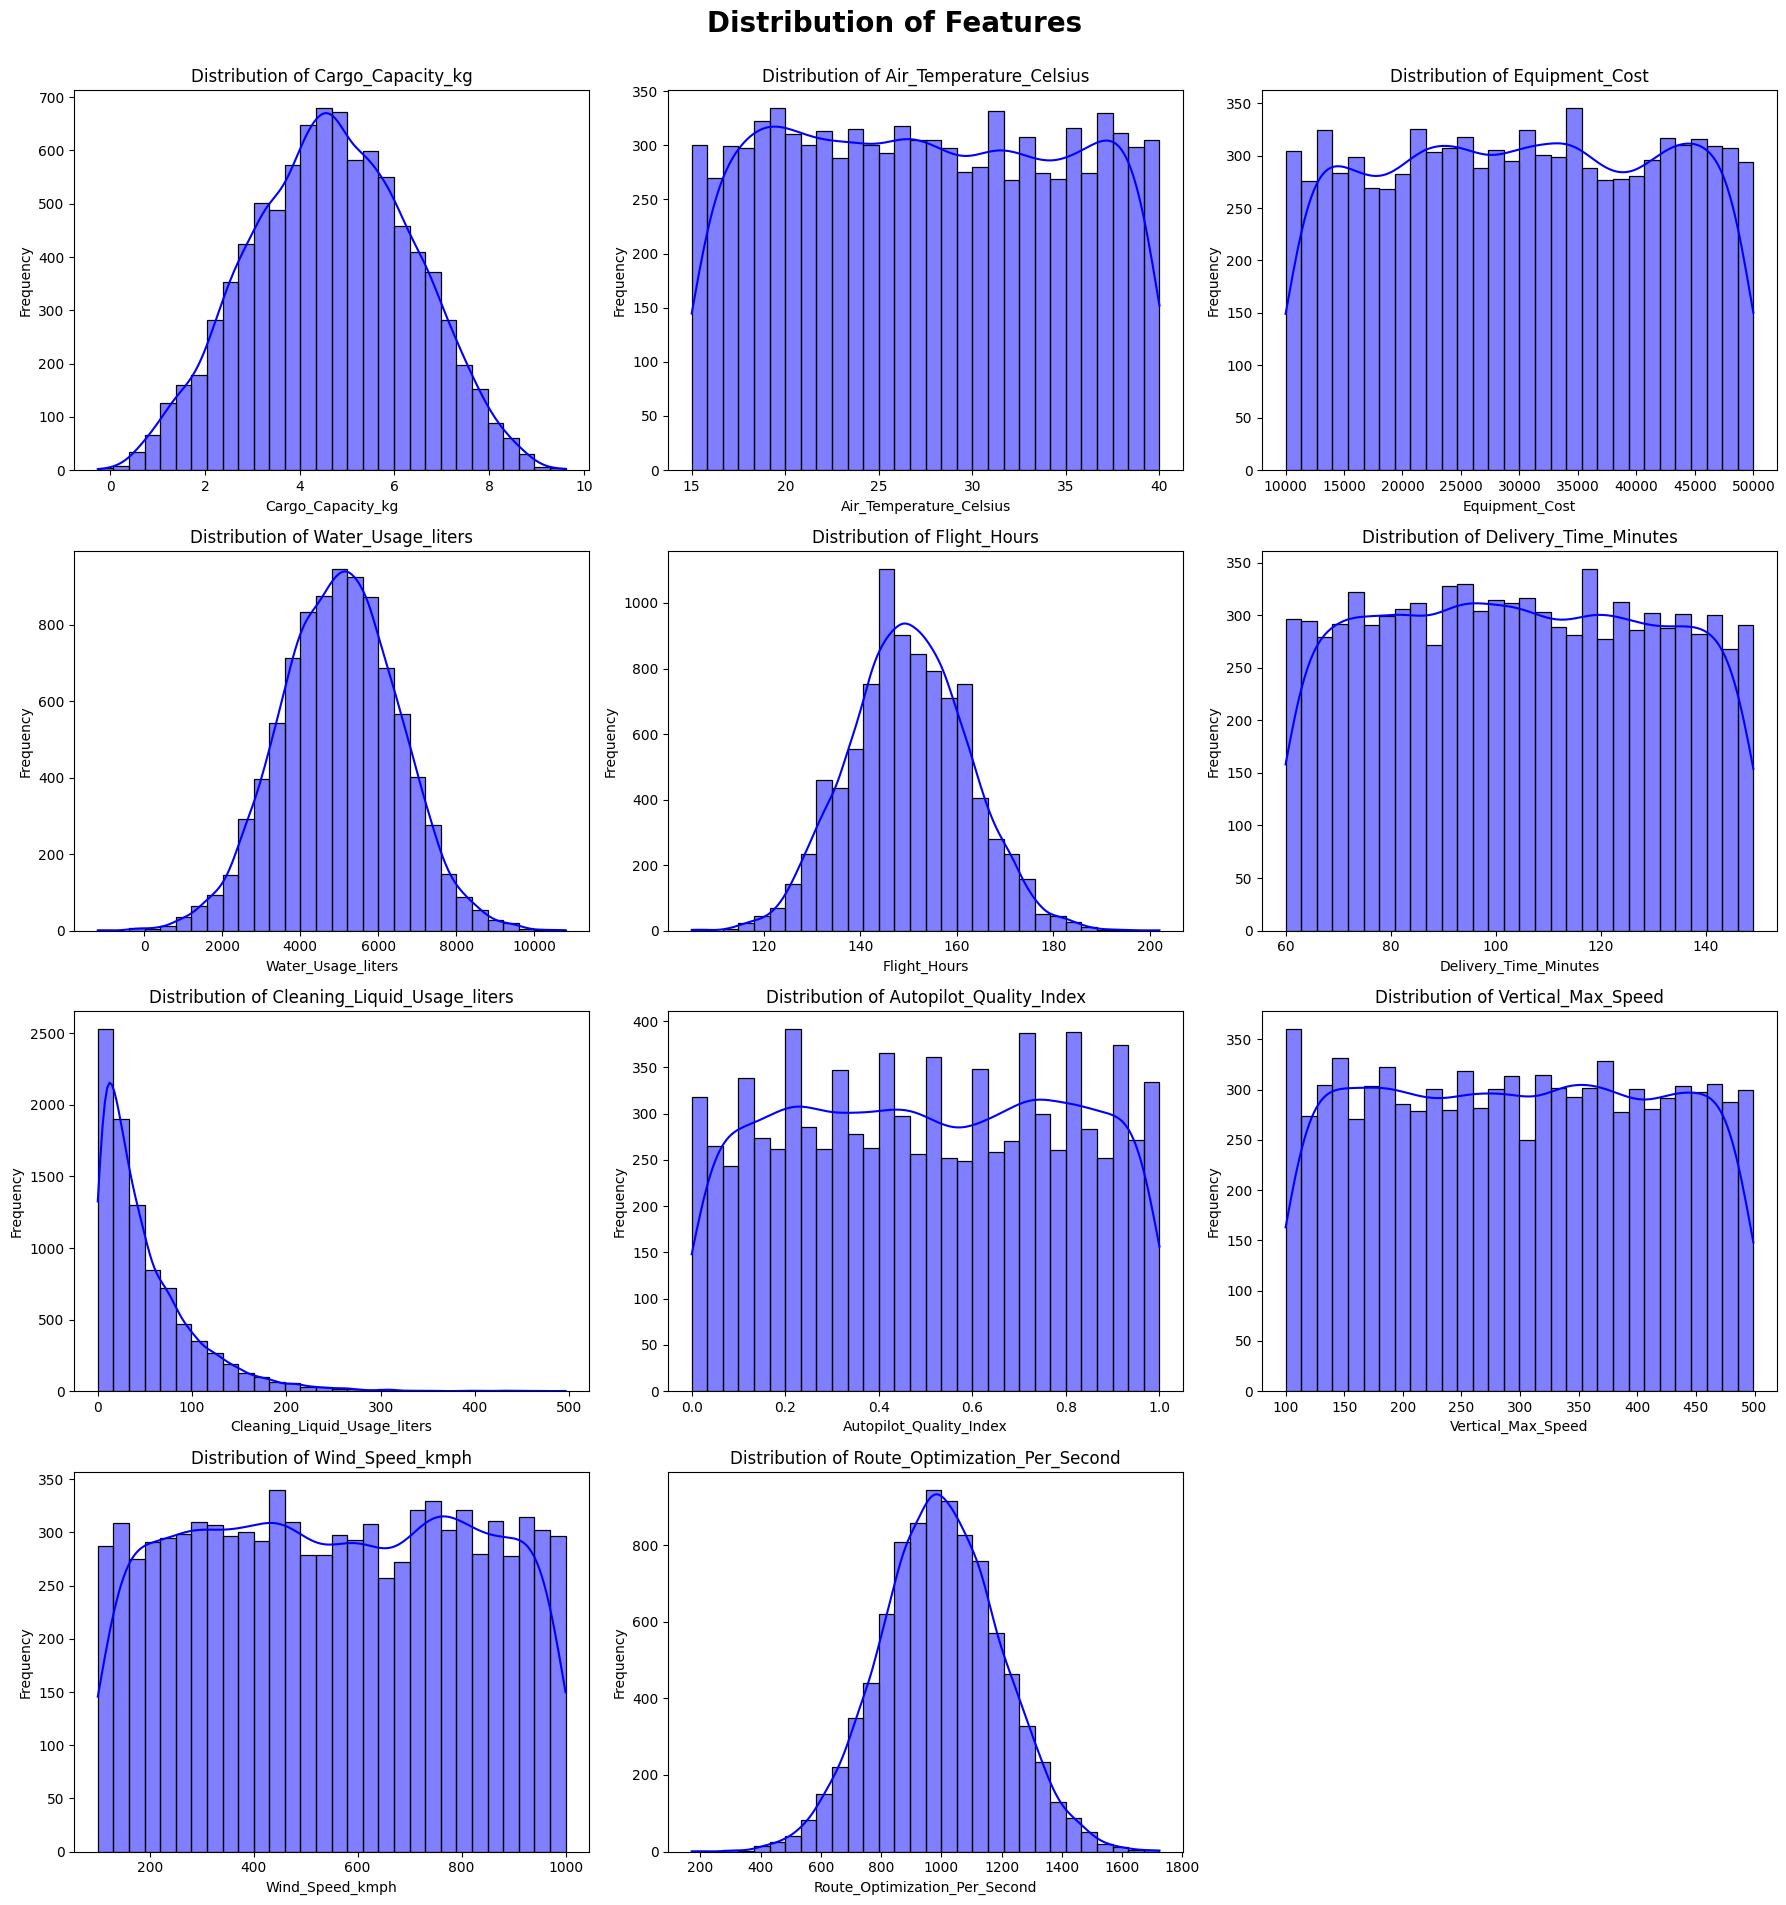

In [55]:
# Numerical columns to plot
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Number of rows and columns for the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))  # Adjust size as needed

# Set a header for the subplot
fig.suptitle("Distribution of Features", fontsize=20, fontweight='bold', y=0.95)

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each numerical column and plot on the corresponding subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the header
plt.show()

*   This graph provides a detailed overview of the distribution of each numerical feature, which is important for understanding data properties like skewness.
*   The skewness of each feature will be used to implement the missing values with using mean or median in data preprocessing.

# Step 4: Data Preprocessing

We preprocessed the dataset by:

1. Handling missing values for numerical and categorical columns.
2. Scaling numerical features and encoding categorical variables using pipelines.


First we identified the numerical and categorical columns.

In [108]:
# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

After identifying, we used `SimpleImputer` from `sklearn.impute` library to impute the missing values.

In [109]:
# Imputing numerical columns with mean
numerical_imputer_mean = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer_mean.fit_transform(df[numerical_cols])

# Imputing the 'Cleaning Liquid Usage' with median
numerical_imputer_median = SimpleImputer(strategy='median')
df[['Cleaning_Liquid_Usage_liters']] = numerical_imputer_median.fit_transform(df[['Cleaning_Liquid_Usage_liters']])

We imputed numerical values (except 'Cleaning Liquid Usage') with their mean values beacuse of the symmetrical distribution of the data

However for 'Cleaning Liquid Usage', we used median for imputing to prevent the misleading of skewness. 

The categorical missing values are filled by looking at the most frequent values of the data.

In [110]:
# Imputing categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

After imputing all the missing values we printed the missing values again for double-check.

In [111]:
print("Missing Values after imputation:\n\n", df.isnull().sum())

Missing Values after imputation:

 Cargo_Capacity_kg                0
Air_Temperature_Celsius          0
Weather_Status                   0
Package_Type                     0
Vertical_Landing                 0
Equipment_Cost                   0
Market_Region                    0
Flight_Duration_Minutes          0
Terrain_Type                     0
Water_Usage_liters               0
Flight_Hours                     0
Delivery_Time_Minutes            0
Cleaning_Liquid_Usage_liters     0
Climate_Zone                     0
Quantum_Battery                  0
Flight_Zone                      0
Autopilot_Quality_Index          0
Vertical_Max_Speed               0
Wind_Speed_kmph                  0
Route_Optimization_Per_Second    0
dtype: int64


As it is seen there is no missing values.

After imputing, we defined which columns are imputed with their mean or median values for defining the preprocessor for machine learning models.

In [124]:
numerical_cols_median = ['Cleaning_Liquid_Usage_liters']
numerical_cols_mean = list(set(numerical_cols) - {'Cargo_Capacity_kg'} - set(numerical_cols_median))

We removed the 'Cargo Capacity' since it is the target variable.

The preprocessor is defined to handle the transformation of the dataset, ensuring it is properly prepared for machine learning models. 

In [125]:
numerical_mean_transformer  = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

numerical_median_transformer  = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num_mean', numerical_mean_transformer, numerical_cols_mean),
        ('num_median', numerical_median_transformer, numerical_cols_median),
        ('cat', categorical_transformer, categorical_cols)
    ])



The preprocessor imputes the missing numerical values with mean and median, scales numerical features, and encodes categorical data.

With this process we ensured that the data is clean, standardized and proper for the use of machine learning models.

# Step 5: Model Training

We trained three models:

1. Linear Regression
2. Random Forest
3. Support Vector Regressor (SVR)

Each model uses the same preprocessing pipeline.


In below we defined the feature matrix `X` by removing the target variable `Cargo_Capacity_kg` from the dataset and assigned the target variable to `y` for supervised machine learning.

In [139]:
# Define feature matrix X and target variable y
X = df.drop(columns=['Cargo_Capacity_kg'])
y = df['Cargo_Capacity_kg']

Next we split the feature matrix and target variable into training and testing sets.

In [140]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We divided 80% of the data for training and 20% for testing, using a fixed random state to ensure reproducibility.

We used three different models with the same preprocessing pipeline.

In [141]:
# Linear Regression
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Random Forest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Support Vector Regressor (SVR)
svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])


models = {'Linear Regression': lr_model,
          'Random Forest': rf_model,
          'SVR': svr_model}

* Then we trained all models by using train tests and tested them on test sets. 
* Also we evaluated each model with RMSE and R2. 

In [142]:
# Train models and evaluate performance
results = {}

for name, model in tqdm(models.items(), desc="Training models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'RMSE': rmse, 'R2': r2}

Training models: 100%|██████████| 3/3 [00:08<00:00,  2.81s/it]


After that, we stored the results of evaluations to compare later.

In [143]:
print("Final Evaluation Results:\n")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.4f}, R2 = {metrics['R2']:.4f}")

Final Evaluation Results:

Linear Regression: RMSE = 0.8393, R2 = 0.7278
Random Forest: RMSE = 0.8701, R2 = 0.7075
SVR: RMSE = 0.8751, R2 = 0.7040


# Step 6: Hyperparameter Optimization

We made hyperparameter tuning for optimizing Random Forest and SVR models.

We optimize the Random Forest model by using `GridSearchCV`. 

* First we set the parameter grid for the Grid Search.
* Then we performed the grid search.

In [146]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

# Perform grid search
rf_grid = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_mean',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Equipment_Cost',
                                                                          'Delivery_Time_Minutes',
                                                                          'Wind_Speed_kmph',
                                                                          'Route_Optimization_Per_Second',
                                                                          'Vertical_Max_Speed',
                                                                          'Flight_Hours',
                                                                          'Water_Usage_liters',
                                                                          'Autopilot_Quality_Inde...
                                                                          'Package_Type',
                                                                          'Vertical_Landing',
                                                                          'Market_Region',
                                                                          'Flight_Duration_Minutes',
                                                                          'Terrain_Type',
                                                                          'Climate_Zone',
                                                                          'Quantum_Battery',
                                                                          'Flight_Zone'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

* We decided which are the best parameters and applied them to Random Forest Model.

* Printed the result of the evaluation by RMSE and R2 scores.

In [166]:
# Best parameters and evaluation
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")
best_rf = rf_grid.best_estimator_

# Predict and evaluate with the test set
y_pred_rf = best_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
results['Optimized Random Forest'] = {'RMSE': rf_rmse, 'R2': rf_r2}
print(f"Optimized Random Forest: RMSE = {(rf_rmse):.4f}, R2 = {(rf_r2):.4f}")


Best Random Forest Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Optimized Random Forest: RMSE = 0.8541, R2 = 0.7181


`RandomizedSearchCV` method is used to prevent long optimizing time for the SVR Model.

* First we set the parameters for the Randomized Search.
* Then we performed the randomized search and found the best parameters.

In [150]:
# Hyperparameter tuning for SVR with RandomizedSearchCV
param_dist_svr = {
    'regressor__kernel': ['linear', 'rbf', 'poly'],
    'regressor__C': uniform(0.1, 100),  # Sample C from a uniform distribution
    'regressor__epsilon': uniform(0.01, 1),  # Sample epsilon from a uniform distribution
    'regressor__gamma': ['scale', 'auto']
}

# Randomized search
svr_random_search = RandomizedSearchCV(
    svr_model,
    param_distributions=param_dist_svr,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

svr_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_mean',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Equipment_Cost',
                                                                                'Delivery_Time_Minutes',
                                                                                'Wind_Speed_kmph',
                                                                                'Route_Optimization_Per_Second',
                                                                                'Vertical_Max_Speed',
                                                                                'Flight_Hours',
                                                                                'Water_Usage_liters',
                                                                                'Autopilot_Qualit...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'regressor__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16bfe6ea0>,
                                        'regressor__epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x174263410>,
                                        'regressor__gamma': ['scale', 'auto'],
                                        'regressor__kernel': ['linear', 'rbf',
                                                              'poly']},
                   random_state=42, scoring='neg_mean_squared_error')

After applying the best parameters, we evaluated the Optimized SVR and saved the results of the evaluation.

In [169]:
# Best SVR parameters and evaluation
print(f"Best SVR Parameters: {svr_random_search.best_params_}")
best_svr = svr_random_search.best_estimator_

# Predict and evaluate with the test set
y_pred_svr = best_svr.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
svr_r2 = r2_score(y_test, y_pred_svr)
results['Optimized SVR'] = {'RMSE': svr_rmse, 'R2': svr_r2}
print(f"Optimized SVR: RMSE = {(svr_rmse):.4f}, R2 = {(svr_r2):.4f}")

Best SVR Parameters: {'regressor__C': 69.73042728397883, 'regressor__epsilon': 0.722270589924442, 'regressor__gamma': 'scale', 'regressor__kernel': 'linear'}
Optimized SVR: RMSE = 0.8403, R2 = 0.7271


### EVALUATIONS OF THE MODELS

Finally, the code below gives an output including the RMSE and R2 scores of all models and the optimized models so that the user can compare them.

In [156]:
# Displaying the scores
for model_name, result in results.items():
    print(f"{model_name} -> RMSE: {result['RMSE']}, R2: {result['R2']}")

Linear Regression -> RMSE: 0.8392603561450286, R2: 0.7278062253661669
Random Forest -> RMSE: 0.8700718923296896, R2: 0.7074534045999652
SVR -> RMSE: 0.8751372996843026, R2: 0.7040371782465984
Optimized Random Forest -> RMSE: 0.8541407612634675, R2: 0.7180684586240209
Optimized SVR -> RMSE: 0.8402859532490016, R2: 0.7271405637132995
